In [1]:
import glob
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
import numpy as np

In [8]:
def load_image_dataset(path_to_images, resize=None):
    paths = glob.glob(path_to_images)

    dataset = None

    if resize:
        dataset = np.zeros((len(paths), resize[0], resize[1], 3))
    else:
        dataset = np.zeros((len(paths), 512, 512, 3))

    for i, path_to_img in enumerate(paths):
        img = keras.utils.load_img(path_to_img)
        img = keras.preprocessing.image.img_to_array(img)

        if resize:
            img = tf.image.resize(img, resize)

        img = img / 255.
        dataset[i] = img
    return dataset

In [15]:
x_train = load_image_dataset('../data/kpop/*.jpg', (64, 64))

In [17]:
image_size = (64, 64)

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")

In [44]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)

input_img = keras.Input(shape=(64, 64, 3))

# Encoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Flatten()(x)
encoded = layers.Dense(1028, activation='relu')(x)

encoder = keras.Model(input_img, encoded, name='model_encoder')

# Decoder
input_decoder = layers.Dense(2048, activation='relu')(encoded)

x = layers.Reshape((8, 8, 32))(input_decoder)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

In [45]:
# encoded_input = keras.Input(shape=(128, 128, 3), name="image_input")
# x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(encoded_input)
# x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
# x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
# x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D(pool_size=(2, 2), padding='same')(x)
# x = keras.layers.Flatten()(x)
# encoder_output = keras.layers.Dense(512, activation='relu')(x)
#
# model_encoder = keras.Model(encoded_input, encoder_output, name='model_encoder')
#
# decoder_input = keras.layers.Dense(16384, activation='relu')(encoder_output)
#
# x = keras.layers.Reshape((16, 16, 64))(decoder_input)
# x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D(size=(2, 2))(x)
# x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D(size=(2, 2))(x)
# x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D(size=(2, 2))(x)
#
# decoded = layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', padding='same')(x)
#
# autoencoder = keras.Model(encoded_input, decoded, name='model_cnn_autoencoder')

In [46]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 32)        1846

In [47]:
autoencoder.compile(optimizer=optimizer, loss='mse')

tensorboard --logdir=./data/autoencoder

In [54]:
autoencoder.fit(x_train, x_train,
                epochs=2000,
                batch_size=128,
                shuffle=True,
                validation_split=0.10,
                callbacks=[TensorBoard(log_dir='../data/autoencoder')])

Epoch 1/2000
40/40 [==============================] - 1s 35ms/step - loss: 0.0050 - val_loss: 0.0081
Epoch 2/2000
40/40 [==============================] - 1s 30ms/step - loss: 0.0048 - val_loss: 0.0080
Epoch 3/2000
40/40 [==============================] - 1s 29ms/step - loss: 0.0049 - val_loss: 0.0081
Epoch 4/2000
40/40 [==============================] - 1s 27ms/step - loss: 0.0049 - val_loss: 0.0082
Epoch 5/2000
40/40 [==============================] - 1s 27ms/step - loss: 0.0049 - val_loss: 0.0082
Epoch 6/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.0048 - val_loss: 0.0081
Epoch 7/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.0050 - val_loss: 0.0081
Epoch 8/2000
40/40 [==============================] - 1s 25ms/step - loss: 0.0050 - val_loss: 0.0084
Epoch 9/2000
40/40 [==============================] - 1s 24ms/step - loss: 0.0051 - val_loss: 0.0082
Epoch 10/2000
40/40 [==============================] - 1s 23ms/step - loss: 0.0049 - val_lo

In [58]:
autoencoder.save(f"../models/ModelCNNAutoEncoder-{2000}.model")

INFO:tensorflow:Assets written to: ../models/ModelCNNAutoEncoder-2000.model\assets


INFO:tensorflow:Assets written to: ../models/ModelCNNAutoEncoder-2000.model\assets


In [2]:
autoencoder = keras.models.load_model('../models/ModelCNNAutoEncoder-2000.model/')

In [6]:
def load_img(path_to_img, resize=None):
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = tf.image.resize(img, resize)
  return img

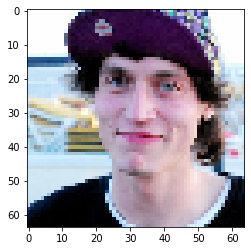

In [7]:
path = '../data/ko.jpg'
x = load_img(path, (64, 64))

plt.imshow(x)

In [8]:
test_decoded_imgs = autoencoder.predict(np.array([x]))

1/1 [==============================] - 10s 10s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


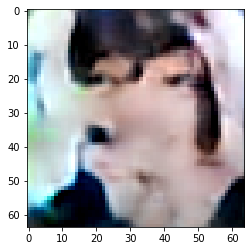

In [9]:
plt.imshow(test_decoded_imgs.reshape(64, 64, 3))